# Lab 8: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 8.A: Decision Trees (50% of grade)

The following code is copied from http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py. You should be able to run the code without error messages.

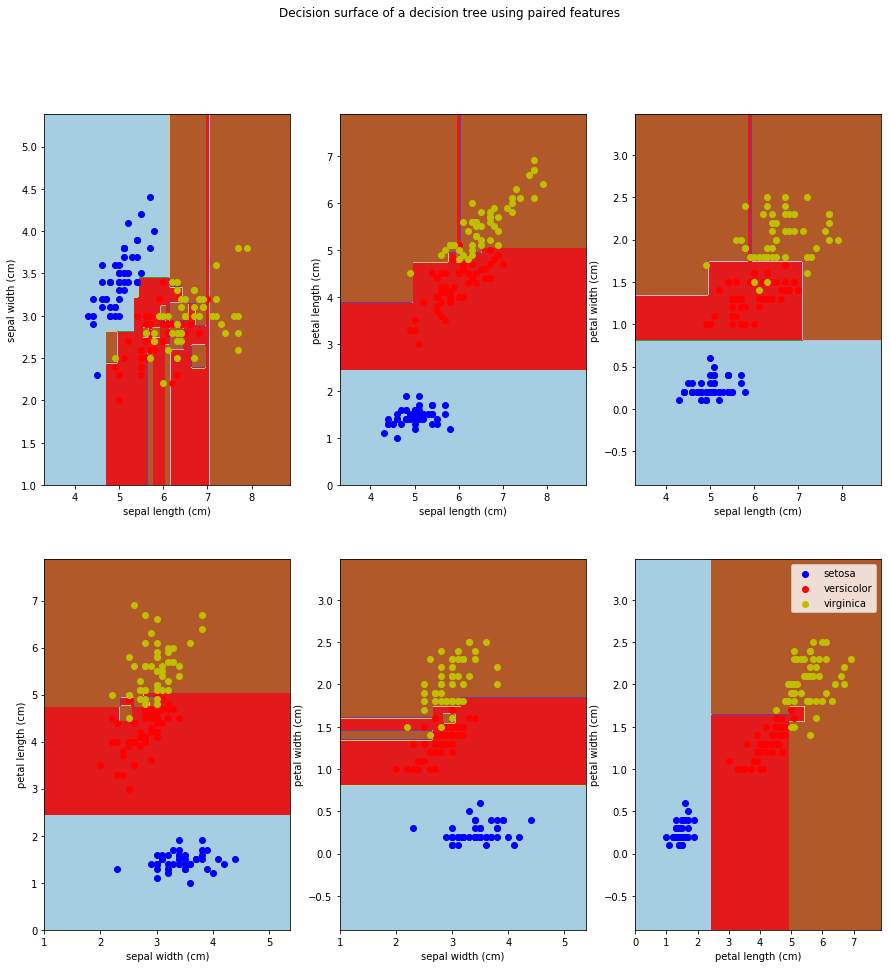

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier 

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(15,15))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier()
    clf.fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show.

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

**Answer 1**: <br>
So we first choose parameters to use later. Load iris data from the sklearn dataset. We then enumerate all possible pairs of attributes so they have an id paired with them and for loop through all pairs Wtihin each for loop some of the code resembles the kNN neighbors code. We compare two attributes at a time within the for loop storing the values in `X` and the true classification labels in `y`. We call the init class function, store it in clf, and fit the data each time with X and y. We create the coordinate matrix for the range of X and y values using meshgrid, then create our predictions of all value pairs of X and y, and lastly we plot the training data points colored based on their index in such a manner: (0, blue), (1, red), (2, yellow).
<br>
There are a few lines of code that are different from before. This includes how we used plt.subplot to create the shape of the different graphs all neatly organized together, and we used plt.contourf to create the boundary lines in the background that resulted depending on the values of coordinate pairs of each data point (xx,yy) and the color they are classified under using Z. The colors used come from the paired colors under the qualitative colormaps reference found here: https://matplotlib.org/examples/color/colormaps_reference.html
<br>
The resulting images show the flowers represented as scatter plots with colors representing their classification. Each of the six graphs seem to have different correlations because the attributes stored as the x- and y- axes values are different. The main getaway from these images is that they show us the difference in background classification color mapping compared to kNN. These graphs have a more rigid, linear structured boundaries rather than jagged lines. This is in part due to the nature of decision trees splitting information down into binary trees where at each level the data is further grouped down until a leaf which stores its classification label is resulted. Hence the background coloring looks like trees where their roots are planted on the side of the map and reaching inwards toward the center until they enwrap their class of colored plots. 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
import time

In [6]:
## Answer 2
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50)

start = time.time()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
end = time.time()
print('Time taken to train Decision Tree:', end-start)

yhat_train = clf.predict(X_train)
print('DT Training data accuracy:', accuracy_score(y_train, yhat_train))

yhat = clf.predict(X_test)
print('DT Test data accuracy:', accuracy_score(y_test, yhat))
print('Confusion matrix of testing data: \n', confusion_matrix(y_test, yhat))
#   The training accuracy and the test accuracy do differ because of the fact that the testing data only represents a
# sizeable percentage of the values contained in the data set. It is not a representative sample of all the data
# values, and we do not wish for the training data to contain all because then we wouldn't be making any new
# inferences from analyzing it via DecisionTreeClassifier. Hence it is normal as there are some value points not
# properly classified when we apply prediction on the testing data.

## taken directly from my code for lab 7
k = 5
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(np.shape(X_train))
predictor = KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);

yhat_train = predictor.predict(X_train)
print('kNN Training data accuracy:', accuracy_score(y_train, yhat_train))

yhat = predictor.predict(X_test)
print('kNN Test data accuracy:', accuracy_score(y_test, yhat))
print('Confusion matrix of testing data: \n', confusion_matrix(y_test, yhat))
#   The accuracy of kNN training data is generally lower than DecisionTree's training data accuracy throughout the
# several times I re-ran this code. However, sometimes the test data accuracy of kNN is better than DT.


#help(clf.tree_)
print('Number of nodes in DecisionTree', clf.tree_.node_count)
print('Max depth of tree', clf.tree_.max_depth)

print('\ngraph code:')
print(export_graphviz(clf, leaves_parallel=True, rounded=True))

Time taken to train Decision Tree: 0.0007863044738769531
DT Training data accuracy: 1.0
DT Test data accuracy: 0.88
Confusion matrix of testing data: 
 [[17  0  0]
 [ 0 12  5]
 [ 0  1 15]]
(100, 4)
kNN Training data accuracy: 0.97
kNN Test data accuracy: 0.94
Confusion matrix of testing data: 
 [[12  0  0]
 [ 0 17  3]
 [ 0  0 18]]
Number of nodes in DecisionTree 9
Max depth of tree 4

graph code:
digraph Tree {
node [shape=box, style="rounded", color="black", fontname=helvetica] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname=helvetica] ;
0 [label="X[3] <= 0.7\ngini = 0.667\nsamples = 100\nvalue = [33, 33, 34]"] ;
1 [label="gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= 4.75\ngini = 0.5\nsamples = 67\nvalue = [0, 33, 34]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.45\ngini = 0.056\n

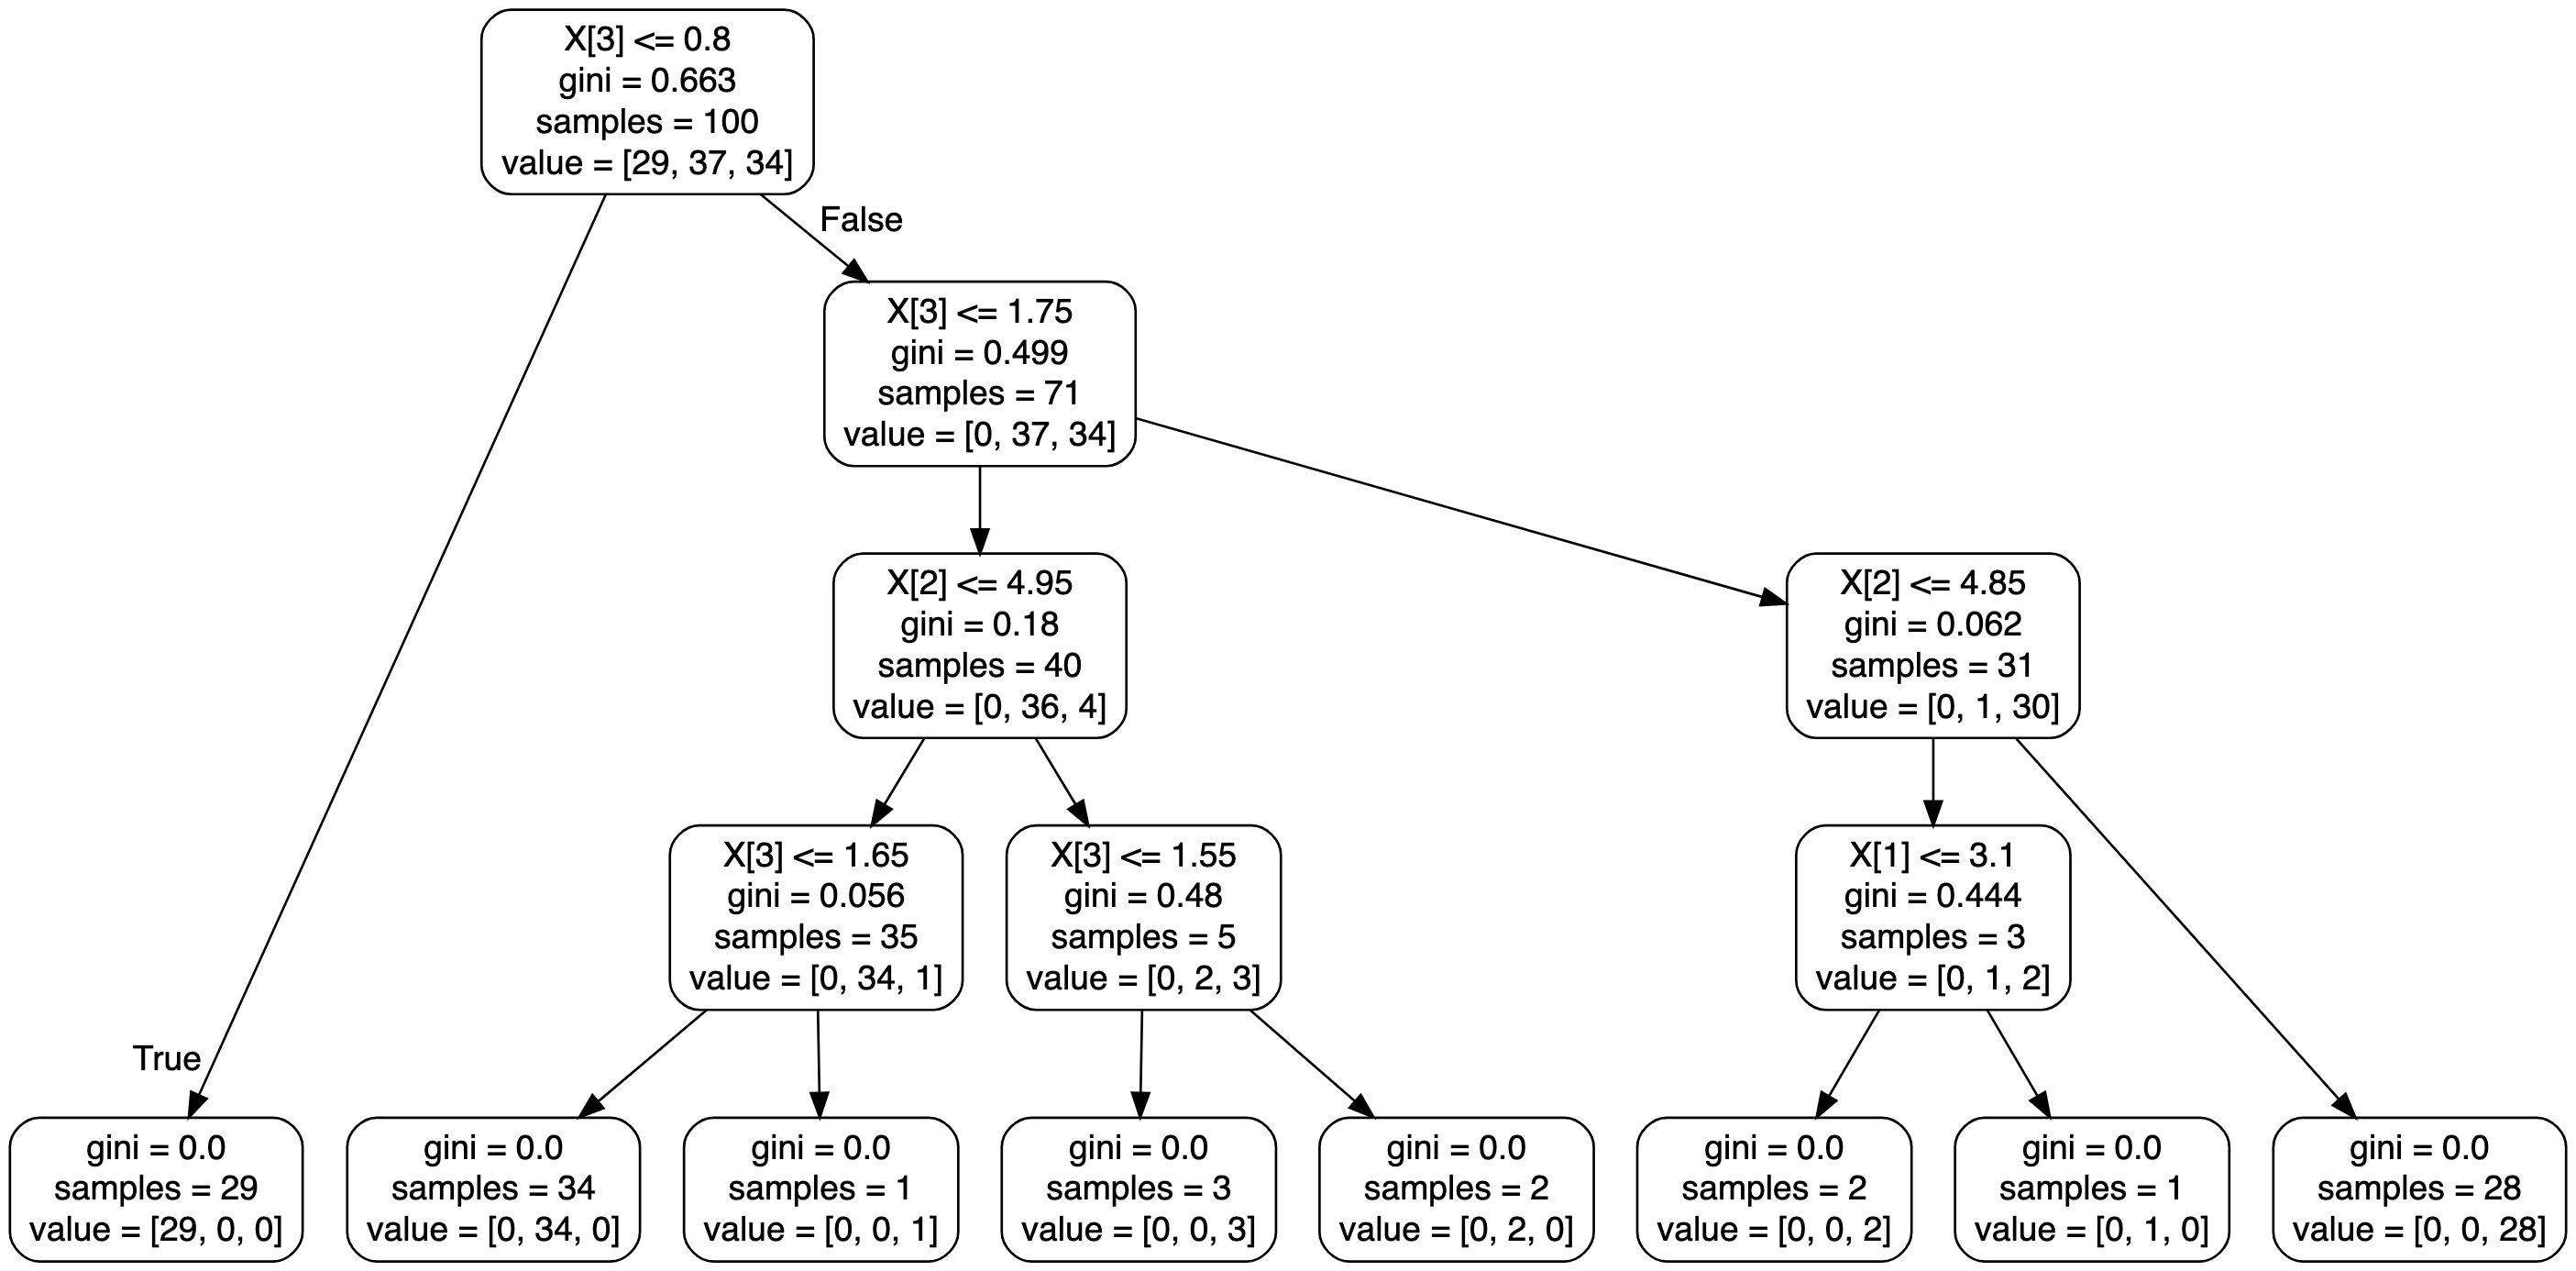

In [7]:
## Answer 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50)
crias = ['gini', 'entropy']
max_depth = [1,2,3,4]
leaf_samples = [1,5,15]
for cria in crias:
    for d in max_depth:
        for leaf in leaf_samples:
            clf = DecisionTreeClassifier(criterion=cria, max_depth=d, min_samples_leaf = leaf)
            clf.fit(X_train, y_train)
            yhat_train = clf.predict(X_train)
            train_acc = accuracy_score(y_train, yhat_train)
            yhat = clf.predict(X_test)
            test_acc = accuracy_score(y_test, yhat)
            print(cria, d, leaf, test_acc, train_acc)
            
#   After messing with the parameters by trying out different combinations, the decision tree did improve in accuracy
# with combinations involving generally criteria=GINI and max_depth=3 or 4, as well as criteria=entropy and max_depth=
# 3 or 4. The best accuracy of 1.0 for the test data was producd most often with the combination (GINI, 3, 5).

gini 1 1 0.62 0.69
gini 1 5 0.62 0.69
gini 1 15 0.62 0.69
gini 2 1 0.96 0.96
gini 2 5 0.96 0.96
gini 2 15 0.96 0.96
gini 3 1 0.96 0.99
gini 3 5 0.96 0.97
gini 3 15 0.96 0.96
gini 4 1 0.96 1.0
gini 4 5 0.96 0.97
gini 4 15 0.96 0.96
entropy 1 1 0.62 0.69
entropy 1 5 0.62 0.69
entropy 1 15 0.62 0.69
entropy 2 1 0.94 0.95
entropy 2 5 0.94 0.95
entropy 2 15 0.94 0.95
entropy 3 1 0.96 0.99
entropy 3 5 0.96 0.99
entropy 3 15 0.94 0.95
entropy 4 1 0.96 1.0
entropy 4 5 0.96 0.99
entropy 4 15 0.94 0.95


## Lab 8.B. Doing supervised learning on churn data set (50 points)

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [8]:
import pandas as pd
#data set from yhathq: http://blog.yhathq.com/posts/predicting-customer-churn-with-sklearn.html
dfchurn=pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
print(dfchurn['Churn?'].value_counts())
np.shape(dfchurn)

False.    2850
True.      483
Name: Churn?, dtype: int64


(3333, 21)

This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data, including answering what fraction of customers left the company, what are attributes about, what are their properties, how are attributes and the churn related. Prepare 1-2 page document summarizing the interesting aspects of the data.

**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

**Question 6**. Train and test a decision tree. Do it on the same training-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.

**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try try to prevent churn. The cost of each contact is `$10`. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is `$30`. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object
Percentage of customers leaving: 14.491449144914492 %

Churn?          False.  True.
CustServ Calls               
0                  605     92
1                 1059    122
2                  672     87
3                  385     44
4                   90     76
5                   26     40
6                    8     14
7                    4      5
8                    1      1
9                    0      2


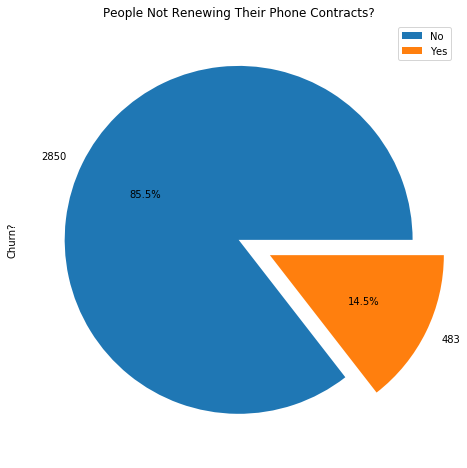

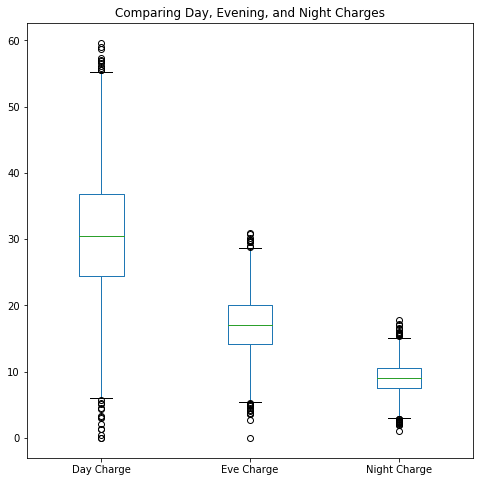

In [31]:
## Answer 4
print(dfchurn.dtypes)
cust_left = dfchurn['Churn?'].value_counts()[1]/dfchurn['Churn?'].count()
print('Percentage of customers leaving:', (cust_left*100), '%')
#print(dfchurn.loc[:,'Day Mins':'Intl Charge'].head(10))

# The data set is information from a telecom company regarding their customer's phone plan and usage. Each column
# contains personal information such as State, Account Length (maybe how many months they've had their account open?),
# area code with phone numbers, and type of phone plan they've purchased. More columns include minutes used, numbers
# of calls used, and charges accrued, these three separated between day, evening, night, and International categories.
# Lastly, there's a column for number of customer service calls and another for 'churn'.
# From what I can tell, the charge columns have some relation to their respective prior two columns which detail the
# number of minutes used spread between how many calls. Another factor that comes into calculating these charges must
# be dependent on what phone plan the customer is on. The last column, churn, I guess is dependent on these columns
# which detail the debt accrued by each customer on their phone plan and occasionally with an angry customer service
# phone call which might not have solved their issues. Thus leading to a customer deciding on leaving if their churn
# column shows False= (no, not leaving) or True= (yes, Bye-bye to these crazy prices). Also, it seems that Day calls
# are more expensive than evening or night calls as evidenced by the first 10 rows where number of minutes used
# at night is very close to the number of minutes used during the day, yet day charge is much more than evening or
# night charges.

# The pie chart to compare percentages of those who are leaving
plt.figure()
values = [dfchurn['Churn?'].value_counts()[0],dfchurn['Churn?'].value_counts()[1]]
dfchurn['Churn?'].value_counts().plot(kind = 'pie', figsize=(8,8), labels=values, autopct='%.1f%%',
                                      explode = (0,0.2))
plt.title('People Not Renewing Their Phone Contracts?')
plt.legend(['No','Yes'])

# The crosstab of how many customer service calls made by each category of those leaving/not leaving
print()
print(pd.crosstab(dfchurn['CustServ Calls'],dfchurn['Churn?']))

# Comparing the box-and-whisker plots of the different charges of day, evening, and night
dfcharges = dfchurn.loc[:,['Day Charge','Eve Charge','Night Charge']]
dfcharges.plot.box(figsize=(8,8), title='Comparing Day, Evening, and Night Charges')

0    72.86
1    55.54
2    59.00
3    65.02
4    49.36
dtype: float64


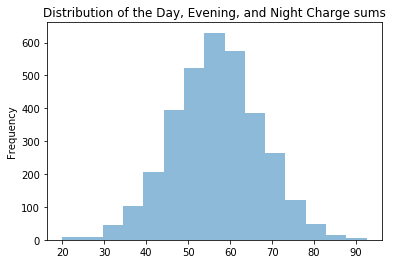

In [39]:
# Histogram of the distribution of total accrued charges
dfsum = dfcharges.sum(axis=1)
print(dfsum.head())
plot_sum = dfsum.plot.hist(bins = 15, alpha=0.5, title='Distribution of the Day, Evening, and Night Charge sums')

In [393]:
# checking for any null and N/A values
# false means there's no null or N/A values, true means there are
print(dfchurn.isna().any().any())
print(dfchurn.isnull().any().any())

# Finding how many distinct states are used for state. The length, I've checked, is 51 because we added DC (not
# actually a state!! -.-).
print(len(dfchurn['State'].unique()))
print(dfchurn["Int'l Plan"].unique())
print(dfchurn['VMail Plan'].unique())
print(dfchurn['Churn?'].unique())
print(dfchurn['Area Code'].unique())

boolean_dict = {'yes':1, 'no':0}
churn_dict = {'False.':0,'True.':1}

False
False
51
['no' 'yes']
['yes' 'no']
['False.' 'True.']
[415 408 510]


In [305]:
# Used to store the highest trials for code to answer 5
highest_kNN_trials = []
highest_kNN_matrix = []
highest_DT_trials = []
highest_DT_matrix = []

In [306]:
## Answer 5 Part 1
from sklearn import preprocessing, neighbors

# Set prediction weights and values (x-axis) as all columns except ['Churn?']
# Set true labels (y-axis) as ['Churn?']
X = dfchurn.loc[:,:'CustServ Calls']
y = dfchurn.loc[:,'Churn?']

# Cleaning up the data
# I'm doing all the cleaning up before splitting the data to avoid the mess of applying them to the separate
# testing and training data sets.
# I chose to delete [`Phone`] object because it doesn't seem useful in predicting whether someone will "churn", and
# also because we already have area code as a separate attribute. As for [`State`], I used get_dummies method from
# Pandas libary in order to set the state names as columns and the instance of this row being in that state set to
# boolean value of 1 (yes) or 0 (no). Then I concatenated those 51 columns back with the original dataframe of X.
# For [`Int'l Plan`], [`VMail Plan`], and [`Churn?`], I'm choosing to convert those yes/no and True/False to 1s and
# 0s respectively so they're no longer strings.
X = X.drop(columns = 'Phone')
X = pd.concat([X.drop('State', axis=1),pd.get_dummies(X['State'])],axis=1)
X["Int'l Plan"] = X["Int'l Plan"].map(boolean_dict)
X['VMail Plan'] = X['VMail Plan'].map(boolean_dict)
y = y.map(churn_dict)

#Normalizing the columns where the range of the values are too big
scaler = preprocessing.MinMaxScaler()
#X_cols = X.loc[:,'VMail Message':'CustServ Calls'].values.astype(float)
X_cols = X.values.astype(float)
X_norm = pd.DataFrame(scaler.fit_transform(X_cols), index = X.index)
#X_norm.columns = X.columns[5:20]
X_norm.columns = X.columns
for column in X_norm.columns:
    X[column] = X_norm[column]
#print(X.head())

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)

In [307]:
## Answer 5 Part 2
high_score = []
high_matrix = []
num = [5,10,15,25]
weights = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
for k in num:
    for wgt in weights:
        for distance in metrics:
            predictor = KNeighborsClassifier(n_neighbors=k, weights=wgt, metric=distance)
            predictor.fit(X_train, y_train);
            
            yhat_train = predictor.predict(X_train)
            train_acc = accuracy_score(y_train,yhat_train)
            yhat = predictor.predict(X_test)
            test_acc = accuracy_score(y_test,yhat)
            #print('kNN Test data accuracy for combo(',k,',',wgt,',',distance,'):',accuracy_score(y_test, yhat))
            #print('Confusion matrix of testing data: \n', confusion_matrix(y_test, yhat))
            
            if len(high_score) == 0:
                high_score.append([k,wgt,distance,test_acc])
                high_matrix.append(confusion_matrix(y_test,yhat))
            if accuracy_score(y_test,yhat) > high_score[0][3]:
                high_score[0] = [k,wgt,distance,test_acc]
                high_matrix[0] = confusion_matrix(y_test,yhat)

print('highest kNN accuracy combo and accompanying confusion matrix:', high_score)
print(high_matrix[0])
highest_kNN_trials.append(high_score[0])
highest_kNN_matrix.append(high_matrix[0])

highest kNN accuracy combo and accompanying confusion matrix: [[5, 'uniform', 'euclidean', 0.855]]
[[844   2]
 [143  11]]


In [308]:
# To check the list of which combination provided the best accuracy
print(len(highest_kNN_trials))
print(highest_kNN_trials)

1
[[5, 'uniform', 'euclidean', 0.855]]


**Results to Answer 5:**
<br>
So I decided to put everything in nested for loops to test through all different combinations of parameters that I found would generally produce the best accuracies based on past experience working with these parameters. I admit it has absolutely horrible runtime but it gets the job done! Hence, I ignored 'braycurtis' and 'cosine' this time around since all of our values real valued vectors. My best output so far has been 0.871 provided by combinations: `[15, 'uniform', 'chebyshev', 0.87]` and `[5, 'uniform', 'euclidean', 0.871]`. However, I do see that generally `chebyshev` and `manhattan` metrics provide the better accuracy for this data set as it appears the most in my list of stored best trials. Meanwhile the other parameters are seemingly "optimal" when weights='uniform' and metric='uniform based on the top 5 recorded trials in my list.
<br>
Note: I did try to just nest the code in a overarching trial for loop in range(10) but I realized I'd also have to put the train_test_split function within the for loop as well so the train/test split would change every time. This wouldn't work as I need that train/test split to remain the same for Question 6. So I decided to just run it manually 10+ times and store it into another outside list before comparing.

In [309]:
## Answer 6
high_score = []
high_matrix = []
crias = ['gini', 'entropy']
splitters = ['best','random']
split_samples = [2,4,6,8,10]
leaf_samples = [5,10,15,25]
for cria in crias:
    for split_type in splitters:
        for split in split_samples:
            for leaf in leaf_samples:
                clf = DecisionTreeClassifier(criterion=cria, splitter=split_type, max_depth=None,
                                             min_samples_split=split, min_samples_leaf=leaf)
                clf.fit(X_train, y_train)
                yhat_train = clf.predict(X_train)
                train_acc = accuracy_score(y_train, yhat_train)
                yhat = clf.predict(X_test)
                test_acc = accuracy_score(y_test, yhat)
                #print(cria, d, leaf, test_acc, train_acc)
                
                if len(high_score) == 0:
                    high_score.append([cria,split_type,split,leaf,test_acc])
                    high_matrix.append(confusion_matrix(y_test,yhat))
                if test_acc > high_score[0][4]:
                    high_score[0] = [cria,split_type,split,leaf,test_acc]
                    high_matrix[0] = confusion_matrix(y_test,yhat)

print('highest DT accuracy combo and accompanying matrix:', high_score)
print(high_matrix[0])
highest_DT_trials.append(high_score[0])
highest_DT_matrix.append(high_matrix[0])

highest DT accuracy combo and accompanying matrix: [['entropy', 'random', 8, 5, 0.949]]
[[831  15]
 [ 36 118]]


In [310]:
print(len(highest_DT_trials))
print(highest_DT_trials)

1
[['entropy', 'random', 8, 5, 0.949]]


**Results to Answer 6:**
<br>
After testing out several different combinations of parameters for 10+ trials, I found the best accuracy is produced by using `['gini', 'best', 2, 10, 0.958]`. However, out of the 11 runs of recorded highest trials, entropy appeared more often. The thing I can be certain is the default minimum number of splits which is 2 and a minumum of 10 leaf samples works together best on this data set in providing higher accuracy.
<br>
Comparing with the kNN results, DecisionTrees clearly do better for predicting the labels of data points. This is true even when we were testing with the Iris data set, which is much smaller total number of data points. Occasionally the accuracy fluctuates depending on the randomness of the data slices stored into X_ and y_ train and testing variables. But generally the DecisionTrees are able to better parametrize the data and classify for accurately.

In [311]:
## Answer 7 Part 1

# Since my best recorded kNN test accuracy was 0.871, the accompanying confusion matrices are so:
#print(highest_kNN_matrix[0])
# output:
# [[859   6]
# [123  12]]
#print(highest_kNN_matrix[9])
# output:
# [[866   3]
# [126   5]]
#   My expected profit from the matrix that gives me the best profit would be using highest_kNN_matrix[0] which would
# result in $20*6 = $120 profit.
# The best DecisionTree test accuracy was 0.958 which had confusion matrix:
#print(highest_DT_matrix[-1])
# output: 
# [[853  10]
# [ 32 105]]
# The expected profit with this matrix would be $20*95 = $1900 profit.
# However just looking at the accuracy isn't always helpful, as another time I got a lower accuracy of 0.949 but my
# confusion matrix provided more accurate better labeling (more true positives) of the people "churning". Like so:
# [[831  15]
#  [ 36 118]]
# My actual highest expected profit so far is $20*(118-15) = $2060 in profit

In [353]:
## Answer 7 Part 2.1: NearestCentroid classifier and RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid, RadiusNeighborsClassifier

highest_Cen_params = []
highest_Cen_matrix = []
high_score = []
high_matrix = []
metrics = ['euclidean', 'manhattan']
shr_thresh = [None,0.2,0.4,0.6]

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)
    for distance in metrics:
        for shrink in shr_thresh:
            cent = NearestCentroid(metric=distance,shrink_threshold=shrink)
            cent.fit(X_train,y_train)

            yhat_train = cent.predict(X_train)
            train_acc = accuracy_score(y_train,yhat_train)
            yhat = cent.predict(X_test)
            test_acc = accuracy_score(y_test, yhat)

            if len(high_score) == 0:
                high_score.append([distance,shrink,test_acc])
                high_matrix.append(confusion_matrix(y_test,yhat))
            if test_acc > high_score[0][2]:
                high_score[0] = [distance,shrink,test_acc]
                high_matrix[0] = confusion_matrix(y_test,yhat)
    if len(highest_Cen_params) == 0:
        highest_Cen_params.append(high_score[0])
        highest_Cen_matrix.append(high_matrix[0])
    if high_score[0][2] > highest_Cen_params[0][2]:
        highest_Cen_params[0] = high_score[0]
        highest_Cen_matrix[0] = high_matrix[0]

print(highest_Cen_params)
print(highest_Cen_matrix)

highest_Rad_params = []
highest_Rad_matrix = []
high_score = []
high_matrix = []
radii = [4.0,4.5,5.0,5.5,6.0]
weights = ['uniform','distance']
metrics = ['euclidean', 'manhattan','chebyshev','minkowski','cosine']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)
    for r in radii:
        for wgt in weights:
            for distance in metrics:
                rad = RadiusNeighborsClassifier(radius=r, weights=wgt, metric=distance)
                rad.fit(X_train,y_train)

                yhat_train = rad.predict(X_train)
                train_acc = accuracy_score(y_train,yhat_train)
                yhat = rad.predict(X_test)
                test_acc = accuracy_score(y_test, yhat)

                if len(high_score) == 0:
                    high_score.append([r,wgt,distance,test_acc])
                    high_matrix.append(confusion_matrix(y_test,yhat))
                if test_acc > high_score[0][3]:
                    high_score[0] = [r,wgt,distance,test_acc]
                    high_matrix[0] = confusion_matrix(y_test,yhat)
    if len(highest_Rad_params) == 0:
        highest_Rad_params.append(high_score[0])
        highest_Rad_matrix.append(high_matrix[0])
    if high_score[0][3] > highest_Rad_params[0][3]:
        highest_Rad_params[0] = high_score[0]
        highest_Rad_matrix[0] = high_matrix[0]
        
print(highest_Rad_params)
print(highest_Rad_matrix)

[['manhattan', 0.6, 0.862]]
[array([[862,   0],
       [138,   0]])]
[[4.0, 'uniform', 'manhattan', 0.873]]
[array([[872,   0],
       [127,   1]])]


In [362]:
## Answer 7 Part 2.2: RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

high_score = []
high_matrix = []
highest_For_params = []
highest_For_matrix = []
estimators = [10,50,100,150]
crias = ['gini','entropy']
split_samples = [2,4,6]
leaf_samples = [5,10,15]
for n in estimators:
    for cria in crias:
        for split in split_samples:
            for leaf in leaf_samples:
                forest = RandomForestClassifier(n_estimators=n,criterion=cria,
                                                    min_samples_split=split, min_samples_leaf=leaf)
                forest.fit(X_train,y_train)
                
                yhat_train = forest.predict(X_train)
                train_acc = accuracy_score(y_train,yhat_train)
                yhat = forest.predict(X_test)
                test_acc = accuracy_score(y_test,yhat)
                #print([n,cria,split,leaf,test_acc])
                #print(confusion_matrix(y_test,yhat))
                if len(high_score) == 0:
                    high_score.append([n,cria,split,leaf,test_acc])
                    high_matrix.append(confusion_matrix(y_test,yhat))
                if test_acc > high_score[0][4]:
                    high_score[0] = [n,cria,split,leaf,test_acc]
                    high_matrix[0] = confusion_matrix(y_test,yhat)

#if len(highest_For_params) == 0:
#    highest_For_params.append(high_score[0])
#    highest_For_matrix.append(high_matrix[0])
#if high_score[0][4] > highest_For_params[0][4]:
#    highest_For_params[0] = high_score[0]
#    highest_For_matrix[0] = high_matrix[0]

print('Highest accuracy:',high_score[0])
print('Accompanying matrix:\n',high_matrix[0])

Highest accuracy: [50, 'entropy', 4, 5, 0.927]
Accompanying matrix:
 [[862   1]
 [ 72  65]]


**Results to Answer 7:**
<br>
So after going back and looking at my highest DecisionTree trials, I ran it a few more times and I got even better results for true positives (accurately predicting people who will "churn") and reducing false positives. This in turn allowed me to have higher expected profit due to the difference being greater even though the accuracy of that trial was not the highest. This allowed me to see that just depending purely on the accuracy is not the best way to predict which trial will give us the highest expected profit.
<br>
I did try to find higher expected profits by using other classifiers like NearestCentroid, RadiusNeighbors, and RandomForest. The first two didn't really prove to be better than DecisionTree. Maybe they were just on par in accuracy performance to kNN. The last one, however, did give me pretty good accuracy every trial making it comparable to DecisionTrees. Alas, the best accuracy it could give me was 0.927 after few more runs with an expected profit of `$20 * (65-1) = $1280`. This is significantly less than the expected profit from DecisionTrees by at least $600, but it does show that maybe there are classifiers out there which could provide more accuracte true positives and less false positives.